In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!unzip '/content/drive/MyDrive/VIneLeaf/VineLEaf_Image_Datset 2.zip'

Archive:  /content/drive/MyDrive/VIneLeaf/VineLEaf_Image_Datset 2.zip
   creating: VineLEaf_Image_Datset/untitled folder/
replace VineLEaf_Image_Datset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: VineLEaf_Image_Datset/.DS_Store  
replace __MACOSX/VineLEaf_Image_Datset/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/VineLEaf_Image_Datset/._.DS_Store  
   creating: VineLEaf_Image_Datset/untitled folder 5/
   creating: VineLEaf_Image_Datset/untitled folder 2/
   creating: VineLEaf_Image_Datset/untitled folder 3/
   creating: VineLEaf_Image_Datset/untitled folder 4/
   creating: VineLEaf_Image_Datset/untitled folder 8/
   creating: VineLEaf_Image_Datset/untitled folder 6/
   creating: VineLEaf_Image_Datset/untitled folder 7/
  inflating: VineLEaf_Image_Datset/untitled folder/483162a.jpg  
  inflating: __MACOSX/VineLEaf_Image_Datset/untitled folder/._483162a.jpg  
  inflating: VineLEaf_Image_Datset/untitled folder/483162b.jpg  
  inflating: __M

In [13]:
pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import splitfolders

In [14]:
input_folder = '/content/VineLEaf_Image_Datset'

In [15]:
splitfolders.ratio(input_folder, output="", 
                   seed=42, ratio=(.7, .2, .1), 
                   group_prefix=None)


Copying files: 298 files [00:00, 318.61 files/s]


In [20]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

In [24]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [26]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '_MACOSX/train'
valid_path = '_MACOSX/val'
test_path = '_MACOSX/train'

In [28]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [29]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [31]:
  # useful for getting number of output classes
folders = glob('_MACOSX/train/*')

In [32]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [33]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [34]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                             

In [35]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [36]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [37]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('_MACOSX/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 206 images belonging to 8 classes.


In [38]:

test_set = test_datagen.flow_from_directory('_MACOSX/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 35 images belonging to 8 classes.


In [39]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-39-04ffb29a66a7>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
7/7 [==============================] - 53s 7s/step - loss: 23.4864 - accuracy: 0.1214 - val_loss: 25.6158 - val_accuracy: 0.1714
Epoch 2/10
7/7 [==============================] - 39s 5s/step - loss: 16.1141 - accuracy: 0.2573 - val_loss: 10.1324 - val_accuracy: 0.2857
Epoch 3/10
7/7 [==============================] - 40s 5s/step - loss: 7.5984 - accuracy: 0.3107 - val_loss: 16.1372 - val_accuracy: 0.2286
Epoch 4/10
7/7 [==============================] - 40s 5s/step - loss: 7.1776 - accuracy: 0.3835 - val_loss: 9.1033 - val_accuracy: 0.1714
Epoch 5/10
7/7 [==============================] - 39s 5s/step - loss: 4.1976 - accuracy: 0.5097 - val_loss: 11.3276 - val_accuracy: 0.2571
Epoch 6/10
7/7 [==============================] - 41s 6s/step - loss: 2.9583 - accuracy: 0.5728 - val_loss: 6.8363 - val_accuracy: 0.3143
Epoch 7/10
7/7 [==============================] - 39s 6s/step - loss: 1.9899 - accuracy: 0.6553 - val_loss: 7.5448 - val_accuracy: 0.2286
Epoch 8/10
7/7 [============

In [40]:
import matplotlib.pyplot as plt

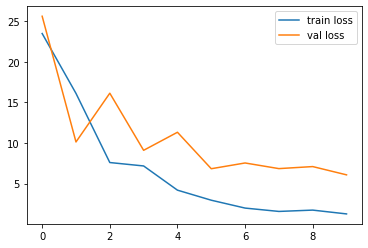

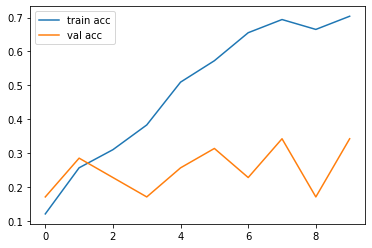

<Figure size 432x288 with 0 Axes>

In [41]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [42]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [43]:
y_pred = model.predict(test_set)

2/2 [==============================] - 7s 525ms/step


In [44]:
y_pred

array([[6.9552962e-06, 2.8364880e-03, 5.8932903e-05, 3.8703841e-03,
        8.0357258e-06, 3.3285829e-08, 6.9518256e-01, 2.9803661e-01],
       [9.1433251e-01, 5.9377003e-02, 8.3645846e-04, 6.6818536e-04,
        1.2584229e-03, 2.1567238e-02, 3.5965212e-07, 1.9598273e-03],
       [8.8471752e-01, 5.9845027e-02, 1.3057009e-04, 3.1574964e-04,
        9.7052907e-07, 5.2158549e-02, 4.3722990e-05, 2.7878378e-03],
       [3.8663092e-07, 1.4679790e-06, 3.2206301e-02, 8.0096716e-04,
        1.5128439e-08, 6.7934649e-05, 3.9482153e-08, 9.6692282e-01],
       [5.0179310e-08, 2.5161160e-03, 2.2509559e-05, 2.0836031e-07,
        1.4795425e-08, 1.2979973e-07, 9.0235353e-01, 9.5107369e-02],
       [3.0596312e-09, 6.8670081e-04, 9.3665010e-01, 5.8616944e-02,
        1.4840473e-11, 1.8626762e-08, 1.1744191e-04, 3.9288285e-03],
       [1.1148417e-03, 8.5294177e-04, 8.5292840e-01, 1.3588686e-01,
        4.7794842e-06, 1.5576463e-06, 6.2937136e-03, 2.9168674e-03],
       [1.0742053e-07, 2.1600219e-08, 3.3

In [45]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [46]:
y_pred


array([6, 0, 0, 7, 6, 2, 2, 7, 2, 4, 4, 7, 1, 7, 7, 7, 4, 7, 3, 3, 1, 3,
       7, 1, 2, 7, 7, 3, 1, 2, 7, 5, 0, 1, 2])

In [47]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [48]:
model=load_model('model_resnet50.h5')

OSError: ignored